In [105]:
from pathlib import Path
import pickle, gzip, math, os, time, shutil, matplotlib as mpl, matplotlib.pyplot as plt

In [106]:
MNIST_URL = 'https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'
path_data = Path('../data')
path_data.mkdir(exist_ok=True)
path_gz = path_data/'mnist.pkl.gz'

In [107]:
from urllib.request import urlretrieve
if not path_gz.exists(): 
    urlretrieve(MNIST_URL, path_gz)

In [108]:
!ls -l {path_data}

total 16656
-rw-rw-r-- 1 pico pico 17051982 Oct 26 17:01 mnist.pkl.gz


In [109]:
with gzip.open(path_gz, 'rb') as f:
    ((x_train, y_train), (x_valid,y_valid), _) = pickle.load(f,encoding='latin-1')

In [110]:
lst1 = list(x_train[0])
vals = lst1[200:210]
vals

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

In [111]:
def chunks(x, sz):
    for i in range(0,len(x),sz):
        yield x[i:i+sz]

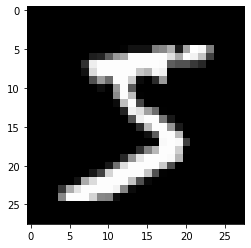

In [112]:
mpl.rcParams['image.cmap'] = 'gray'
plt.imshow(list(chunks(lst1,28)))

In [113]:
from itertools import islice

In [114]:
it = iter(vals)

In [115]:
ii= islice(it,5)

In [116]:
next(ii)

0.0

In [117]:
def f(): return list(islice(it,28))

In [118]:
it = iter(lst1)

In [119]:
f()

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [120]:
it = iter(lst1)
img = list(iter(lambda : list(islice(it,28)),[]))

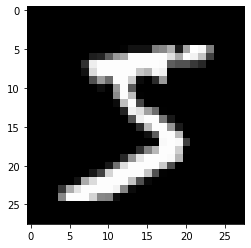

In [121]:
plt.imshow(img)

## Matrix and tensor

In [122]:
img[20][15] 

0.98828125

In [123]:
class Matrix:
    def __init__(self,xs):
        self.xs = xs
    def __getitem__(self, idxs): 
        return self.xs[idxs[0]][idxs[1]]

In [124]:
m = Matrix(img)
m[20,15]

0.98828125

In [125]:
import torch
from torch import tensor

In [126]:
tensor([1,2,3])

tensor([1, 2, 3])

In [127]:
tens = tensor(img)

In [128]:
tens[20,15]

tensor(0.99)

In [129]:
#convert lists into tensors
x_train, y_train,x_valid,y_valid = map(tensor,(x_train, y_train,x_valid,y_valid))
x_train.shape

torch.Size([50000, 784])

In [130]:
imgs = x_train.reshape(-1,28,28)
imgs.shape

torch.Size([50000, 28, 28])

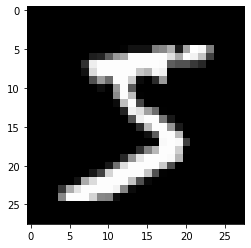

In [131]:
plt.imshow(imgs[0])

In [132]:
imgs[0,20,15]

tensor(0.99)

In [133]:
x_train.shape

torch.Size([50000, 784])

In [134]:
n,c = x_train.shape

In [135]:
y_train, y_train.shape

(tensor([5, 0, 4,  ..., 8, 4, 8]), torch.Size([50000]))

In [136]:
n

50000

In [137]:
min(y_train), max(y_train)

(tensor(0), tensor(9))

In [138]:
y_train.min() , y_train.max()

(tensor(0), tensor(9))

## Random numbers 

In [139]:
rnd_state = None
def seed(a):
    global rnd_state
    a, x = divmod(a, 30268)
    a, y = divmod(a, 30306)
    a, z = divmod(a, 30322)
    rnd_state = int(x)+1, int(y)+1, int(z)+1

In [140]:
seed(340570)
rnd_state

(7623, 12, 1)

In [141]:
def rand():
    global rnd_state
    x, y, z = rnd_state
    x = (171 * x) % 30269
    y = (172 * y) % 30307
    z = (170 * z) % 30323
    rnd_state = x,y,z
    return (x/30269 + y/30307 + z/30323) % 1.0

In [142]:
rand(), rand(), rand()

(0.13866032384694274, 0.7734121508792164, 0.014135376180295145)

In [143]:
%timeit -n 10 list(chunks([rand() for _ in range(7840)],10))

3.28 ms ± 433 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [144]:
%timeit -n 10 torch.randn(784,10)

The slowest run took 28.47 times longer than the fastest. This could mean that an intermediate result is being cached.
179 µs ± 347 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [145]:
torch.cuda.is_available()

True

## matrix multiplication

In [146]:
torch.manual_seed(1)
weights = torch.randn(784,10)
bias = torch.zeros(10)

In [147]:
m1 = x_valid[:5]
m2 = weights

In [148]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [149]:
ar,ac = m1.shape
br,bc = m2.shape
(ar,ac),(br,bc)

((5, 784), (784, 10))

In [150]:
t1 = torch.zeros(ar,bc)
t1.shape

torch.Size([5, 10])

In [151]:
for i in range(ar):
    for j in range(bc):
        for k in range(ac):
            t1[i,j] += m1[i,k]*m2[k,j] 

In [152]:
torch.set_printoptions(precision=2, linewidth=140, sci_mode=False)
t1

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [153]:
t1.shape

torch.Size([5, 10])

In [154]:
import numpy as np
np.set_printoptions(precision=2, linewidth=140)

In [155]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape, b.shape
    c = torch.zeros(ar,bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac):
                c[i,j] += a[i,k]*b[k,j]
    return c

In [156]:
%time _ = matmul(m1,m2)

CPU times: user 503 ms, sys: 0 ns, total: 503 ms
Wall time: 503 ms


In [157]:
ar*bc*ac

39200

## Numba

In [158]:
from numba import njit

In [159]:
@njit
def dot(a,b):
    res = 0.
    for i in range(len(a)):
        res += a[i]*b[i]
    return res

In [160]:
from numpy import array

In [161]:
%time dot(array([1.,2,3]),array([2.,3,4]))

CPU times: user 58.8 ms, sys: 8.12 ms, total: 66.9 ms
Wall time: 64 ms


20.0

In [162]:
%time dot(array([1.,2,3]),array([2.,3,4]))

CPU times: user 14 µs, sys: 1 µs, total: 15 µs
Wall time: 17.9 µs


20.0

In [163]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape, b.shape
    c = torch.zeros(ar,bc)
    for i in range(ar):
        for j in range(bc):
            c[i,j] = dot(a[i,:],b[:,j])
    return c

In [164]:
m1a,m2a = m1.numpy(),m2.numpy()

In [165]:
from fastcore.test import *

In [166]:
test_close(t1,matmul(m1a,m2a))

In [167]:
%timeit -n 50 matmul(m1a,m2a)

324 µs ± 11.7 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


## Elementwise ops

In [168]:
a =  tensor([10.,6,-4])
b = tensor([2., 8, 7])
a,b

(tensor([10.,  6., -4.]), tensor([2., 8., 7.]))

In [169]:
a + b

tensor([12., 14.,  3.])

In [170]:
(a < b).float().mean()

tensor(0.67)

In [171]:
m = tensor([[1., 2, 3], [4., 5, 6], [7., 8, 9]]); m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

## frobenius norm

In [172]:
sf = (m*m).sum()
sf

tensor(285.)

In [173]:
sf.sqrt()

tensor(16.88)

In [174]:
m[2,:],m[:,2]

(tensor([7., 8., 9.]), tensor([3., 6., 9.]))

In [175]:
m[2]

tensor([7., 8., 9.])

In [176]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape, b.shape
    c = torch.zeros(ar,bc)
    for i in range(ar):
        for j in range(bc):
            c[i,j] = (a[i,:]*b[:,j]).sum()
    return c

In [177]:
test_close(t1,matmul(m1,m2))

In [178]:
%timeit -n 50 _=matmul(m1,m2)

761 µs ± 43 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [179]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape, b.shape
    c = torch.zeros(ar,bc)
    for i in range(ar):
        for j in range(bc):
            c[i,j] = torch.dot(a[i,:],b[:,j])
    return c

In [180]:
test_close(t1,matmul(m1,m2))

In [181]:
%timeit -n 50 _=matmul(m1,m2)

593 µs ± 63.6 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


## Broadcasting

In [182]:
a

tensor([10.,  6., -4.])

In [183]:
a > 0

tensor([ True,  True, False])

In [184]:
a+1

tensor([11.,  7., -3.])

In [185]:
c = tensor([10, 20, 30]);c

tensor([10, 20, 30])

In [186]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [187]:
m.shape, c.shape

(torch.Size([3, 3]), torch.Size([3]))

In [188]:
c+ m

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [189]:
t = c.expand_as(m)

In [190]:
t

tensor([[10, 20, 30],
        [10, 20, 30],
        [10, 20, 30]])

In [191]:
m+t

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [192]:
t.storage()

 10
 20
 30
[torch.storage._TypedStorage(dtype=torch.int64, device=cpu) of size 3]

In [193]:
t.stride(), t.shape

((0, 1), torch.Size([3, 3]))

In [194]:
c.unsqueeze(0), c[None, :]

(tensor([[10, 20, 30]]), tensor([[10, 20, 30]]))

In [195]:
c.shape, c.unsqueeze(0).shape

(torch.Size([3]), torch.Size([1, 3]))

In [196]:
c.unsqueeze(1), c[:,None]

(tensor([[10],
         [20],
         [30]]),
 tensor([[10],
         [20],
         [30]]))

In [197]:
c[None].shape, c[..., None].shape

(torch.Size([1, 3]), torch.Size([3, 1]))

In [198]:
c[:,None].expand_as(m)

tensor([[10, 10, 10],
        [20, 20, 20],
        [30, 30, 30]])

In [199]:
m + c[:,None]

tensor([[11., 12., 13.],
        [24., 25., 26.],
        [37., 38., 39.]])

In [103]:
m + c[None,:]

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [104]:
m + c

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

## Broadcasting rules

In [200]:
c

tensor([10, 20, 30])

In [201]:
c[None,:]

tensor([[10, 20, 30]])

In [202]:
c[None,:].shape

torch.Size([1, 3])

In [203]:
c[:,None]

tensor([[10],
        [20],
        [30]])

In [204]:
c[:,None].shape

torch.Size([3, 1])

In [205]:
c[None,:]*c[:,None]

tensor([[100, 200, 300],
        [200, 400, 600],
        [300, 600, 900]])

In [206]:
c[None] > c[:,None]

tensor([[False,  True,  True],
        [False, False,  True],
        [False, False, False]])

## MAtmul with broadcasting

In [207]:
digit = m1[0]
digit.shape, m2.shape

(torch.Size([784]), torch.Size([784, 10]))

In [209]:
digit[:,None].shape

torch.Size([784, 1])

In [216]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape, b.shape
    c = torch.zeros(ar,bc)
    for i in range(ar):
        c[i] = (a[i,:,None]*b).sum(dim=0)
    return c

In [217]:
test_close(t1,matmul(m1,m2))

In [218]:
%timeit -n 50 _=matmul(m1,m2)

152 µs ± 54 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [221]:
tr = matmul(x_train,weights)
tr

tensor([[  0.96,  -2.96,  -2.11,  ..., -15.09, -17.69,   0.60],
        [  6.89,  -0.34,   0.79,  ..., -17.13, -25.36,  16.23],
        [-10.18,   7.38,   4.13,  ...,  -6.73,  -6.79,  -1.58],
        ...,
        [  7.40,   7.64,  -3.50,  ...,  -1.02, -16.22,   2.07],
        [  3.25,   9.52,  -9.37,  ...,   2.98, -19.58,  -1.96],
        [ 15.70,   4.12,  -5.62,  ...,   8.08, -12.21,   0.42]])

In [222]:
tr.shape

torch.Size([50000, 10])

In [224]:
%time _ = matmul(x_train, weights)

CPU times: user 2.06 s, sys: 14.8 ms, total: 2.08 s
Wall time: 1.23 s


## Einstein summation